In [14]:
import random
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List

In [15]:
# State
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [16]:
# Nodes
def greet(state: AgentState) -> AgentState:
    """Greets the user and init the counter"""
    state['counter'] = 0
    state['name'] = f"Hello, {state['name']}! This is greeting number {state['counter']}."
    return state
def loop(state: AgentState) -> AgentState:
    """Looping action node"""
    state['number'].append(random.randint(1, 20))
    state['counter'] += 1
    return state
def loop_decision(state: AgentState) -> AgentState:
    """Decides whether to loop again or finish"""
    if state['counter'] < 3:
        return "loop"
    else:
        return "end"

In [18]:
# StateGraph
graph = StateGraph(AgentState)
graph.add_node("greet_node", greet)
graph.add_node("loop_node", loop)
graph.add_edge("greet_node", "loop_node")

# Conditional Edge for looping
graph.add_conditional_edges("loop_node",
                            loop_decision,
                            {
                                "loop": "loop_node",
                                "end": END
                            })
# We already have a exit point so just set the entry point
graph.set_entry_point("greet_node")
app = graph.compile()

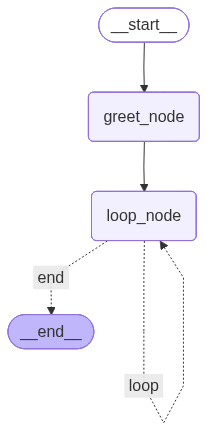

In [19]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
# Testing
result = app.invoke(
    {"name": "Sumit",
     "number": [],
     "counter": 0
     }
)
print(result)  # should have 3 random numbers in the list

{'name': 'Hello, Sumit! This is greeting number 0.', 'number': [6, 20, 9], 'counter': 3}


In [ ]:
# See that the AgentState is the one change throught the whole graph